<a href="https://colab.research.google.com/github/ademsultnm/Aplikasi-Login/blob/main/projek_tugas_14_Deteksi_Anomali_1462100157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving MiningProcess_Flotation_Plant_Database_2000.csv to MiningProcess_Flotation_Plant_Database_2000.csv


In [2]:
import pandas as pd

# Gantilah 'MiningProcess_Flotation_Plant_Database.csv' dengan nama file yang diunggah
file_path = '/content/MiningProcess_Flotation_Plant_Database_2000.csv'
# Pastikan untuk mengatur pemisah desimal yang tepat (misalnya, koma untuk angka desimal)
df = pd.read_csv(file_path, decimal=',')  # Menyesuaikan dengan pemisah desimal yang benar

# Menampilkan beberapa baris dari dataset untuk memastikan file telah dibaca dengan benar
print(df.head())


<ipython-input-2-e9a670cd821c>:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, decimal=',')  # Menyesuaikan dengan pemisah desimal yang benar


                                                                                                                                                                                                        date;% Iron Feed;% Silica Feed;Starch Flow;Amina Flow;Ore Pulp Flow;Ore Pulp pH;Ore Pulp Density;Flotation Column 01 Air Flow;Flotation Column 02 Air Flow;Flotation Column 03 Air Flow;Flotation Column 04 Air Flow;Flotation Column 05 Air Flow;Flotation Column 06 Air Flow;Flotation Column 07 Air Flow;Flotation Column 01 Level;Flotation Column 02 Level;Flotation Column 03 Level;Flotation Column 04 Level;Flotation Column 05 Level;Flotation Column 06 Level;Flotation Column 07 Level;% Iron Concentrate;% Silica Concentrate
Friday  10 March 2017;5520 00%;1698 00%;3019 53;557 434;395 713;10 0664;1 74;249 214;253 235;250 576;295 096;306 4;250 225;250 884;457 396;432 962;424 954;443 558;502 255;446 37;523  344;6691 00%;131                                                00%                            

In [3]:
# Memeriksa informasi dataset
print(df.info())

# Menghapus baris yang memiliki nilai NaN
df = df.dropna()

# Menampilkan informasi setelah membersihkan data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 737453 entries, ('Friday', ' 10 March 2017;5520', '00%;1698', '00%;3019', '53;557', '434;395', '713;10', '0664;1', '74;249', '214;253', '235;250', '576;295', '096;306', '4;250', '225;250', '884;457', '396;432', '962;424', '954;443', '558;502', '255;446', '37;523', '344;6691', '00%;131') to (';;;;;;;;;;;;;;;;;;;;;;;', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [4]:
# Menggunakan hanya fitur numerik untuk deteksi anomali
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_features]

# Memastikan tidak ada nilai NaN atau non-numerik
print(data.isnull().sum())

# Menampilkan beberapa baris dari data numerik
print(data.head())


Series([], dtype: float64)
Empty DataFrame
Columns: []
Index: [(Friday,  10 March 2017;5520, 00%;1698, 00%;3019, 53;557, 434;395, 713;10, 0664;1, 74;249, 214;253, 235;250, 576;295, 096;306, 4;250, 225;250, 884;457, 396;432, 962;424, 954;443, 558;502, 255;446, 37;523, 344;6691, 00%;131), (Friday,  10 March 2017;5520, 00%;1698, 00%;3024, 41;563, 965;397, 383;10, 0672;1, 74;249, 719;250, 532;250, 862;295, 096;306, 4;250, 137;248, 994;451, 891;429, 56;432, 939;448, 086;496, 363;445, 922;498, 075;6691, 00%;131), (Friday,  10 March 2017;5520, 00%;1698, 00%;3043, 46;568, 054;399, 668;10, 068;1, 74;249, 741;247, 874;250, 313;295, 096;306, 4;251, 345;248, 071;451, 24;468, 927;434, 61;449, 688;484, 411;447, 826;458, 567;6691, 00%;131), (Friday,  10 March 2017;5520, 00%;1698, 00%;3047, 36;568, 665;397, 939;10, 0689;1, 74;249, 917;254, 487;250, 049;295, 096;306, 4;250, 422;251, 147;452, 441;458, 165;442, 865;446, 21;471, 411;437, 69;427, 669;6691, 00%;131), (Friday,  10 March 2017;5520, 00%;1698, 

**memvisualisasikan hasil anomali dari data olah diatas**

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

print('Data loaded and initial analysis completed.')

<ipython-input-6-d117d3f36245>:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv')


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 737453 entries, ('Friday', ' 10 March 2017;5520', '00%;1698', '00%;3019', '53;557', '434;395', '713;10', '0664;1', '74;249', '214;253', '235;250', '576;295', '096;306', '4;250', '225;250', '884;457', '396;432', '962;424', '954;443', '558;502', '255;446', '37;523', '344;6691', '00%;131') to (';;;;;;;;;;;;;;;;;;;;;;;', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [7]:
import pandas as pd
import numpy as np

def clean_numeric_columns(df, columns):
    for col in columns:
        df[col] = df[col].str.replace('%', '', regex=False)  # Remove '%' symbol
        df[col] = df[col].str.replace(',', '.', regex=False)  # Replace comma with dot
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, invalid values become NaN
    return df

# Load the data with the correct separator
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Clean and convert numeric columns
numeric_columns = df.columns.drop('date')
df = clean_numeric_columns(df, numeric_columns)

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

print('Data loaded, cleaned, and preprocessed. Ready for anomaly detection.')


<ipython-input-7-cc86b1c951b6>:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          1999 non-null   datetime64[ns]
 1   % Iron Feed                   1999 non-null   float64       
 2   % Silica Feed                 1999 non-null   float64       
 3   Starch Flow                   1999 non-null   float64       
 4   Amina Flow                    1999 non-null   float64       
 5   Ore Pulp Flow                 1999 non-null   float64       
 6   Ore Pulp pH                   1999 non-null   float64       
 7   Ore Pulp Density              1999 non-null   float64       
 8   Flotation Column 01 Air Flow  1999 non-null   float64       
 9   Flotation Column 02 Air Flow  1999 non-null   float64       
 10  Flotation Column 03 Air Flow  1999 non-null   float64       
 11  Flotation Column 04 Air Fl

In [8]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Display information about the dataframe
print(df.info())

# Display the first few rows
print('\
First few rows of the dataframe:')
print(df.head())

# Check for any columns with object dtype
object_columns = df.select_dtypes(include=['object']).columns
print('\
Columns with object dtype:', object_columns)

# Check for any missing values
print('\
Missing values:')
print(df.isnull().sum())

print('Data inspection completed.')


<ipython-input-8-44e651355699>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          1999 non-null   object
 1   % Iron Feed                   1999 non-null   object
 2   % Silica Feed                 1999 non-null   object
 3   Starch Flow                   1999 non-null   object
 4   Amina Flow                    1999 non-null   object
 5   Ore Pulp Flow                 1999 non-null   object
 6   Ore Pulp pH                   1999 non-null   object
 7   Ore Pulp Density              1999 non-null   object
 8   Flotation Column 01 Air Flow  1999 non-null   object
 9   Flotation Column 02 Air Flow  1999 non-null   object
 10  Flotation Column 03 Air Flow  1999 non-null   object
 11  Flotation Column 04 Air Flow  1999 non-null   object
 12  Flotation Column 05 Air Flow  1999 non-null   object
 13  Flotation Colu

In [9]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Function to convert columns to numeric
def to_numeric(x):
    return pd.to_numeric(x.str.replace(',', '.'), errors='coerce')

# Convert all columns except 'date' to numeric
for col in df.columns:
    if col != 'date':
        df[col] = to_numeric(df[col])

# Remove rows with all NaN values
df = df.dropna(how='all')

# Display information about the cleaned dataframe
print(df.info())

# Display the first few rows of the cleaned dataframe
print('\
First few rows of the cleaned dataframe:')
print(df.head())

# Check for any remaining missing values
print('\
Remaining missing values:')
print(df.isnull().sum())

print('Data cleaning completed.')

<ipython-input-9-2dfe866a76fa>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1998
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          0 non-null      datetime64[ns]
 1   % Iron Feed                   0 non-null      float64       
 2   % Silica Feed                 0 non-null      float64       
 3   Starch Flow                   1999 non-null   float64       
 4   Amina Flow                    1999 non-null   float64       
 5   Ore Pulp Flow                 1999 non-null   float64       
 6   Ore Pulp pH                   1999 non-null   float64       
 7   Ore Pulp Density              1999 non-null   float64       
 8   Flotation Column 01 Air Flow  1999 non-null   float64       
 9   Flotation Column 02 Air Flow  1999 non-null   float64       
 10  Flotation Column 03 Air Flow  1999 non-null   float64       
 11  Flotation Column 04 Air Flow  1999 

In [10]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Display the first few rows of the problematic columns
print('First few rows of date, % Iron Feed, and % Silica Feed:')
print(df[['date', '% Iron Feed', '% Silica Feed']].head())

# Check for unique values in these columns
print('\
Unique values in date column:')
print(df['date'].unique()[:5])  # Display first 5 unique values

print('\
Unique values in % Iron Feed column:')
print(df['% Iron Feed'].unique()[:5])  # Display first 5 unique values

print('\
Unique values in % Silica Feed column:')
print(df['% Silica Feed'].unique()[:5])  # Display first 5 unique values

print('\
Data inspection of problematic columns completed.')


<ipython-input-10-9f8fa77e0e23>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


First few rows of date, % Iron Feed, and % Silica Feed:
                    date % Iron Feed % Silica Feed
0  Friday, 10 March 2017    5520,00%      1698,00%
1  Friday, 10 March 2017    5520,00%      1698,00%
2  Friday, 10 March 2017    5520,00%      1698,00%
3  Friday, 10 March 2017    5520,00%      1698,00%
4  Friday, 10 March 2017    5520,00%      1698,00%
Unique values in date column:
['Friday, 10 March 2017' nan]
Unique values in % Iron Feed column:
['5520,00%' '5495,00%' nan]
Unique values in % Silica Feed column:
['1698,00%' '1740,00%' nan]
Data inspection of problematic columns completed.


In [11]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%A, %d %B %Y', errors='coerce')

# Function to convert percentage strings to float
def percentage_to_float(x):
    return pd.to_numeric(x.str.replace(',', '.').str.rstrip('%'), errors='coerce') / 100

# Convert % Iron Feed and % Silica Feed to float
df['% Iron Feed'] = percentage_to_float(df['% Iron Feed'])
df['% Silica Feed'] = percentage_to_float(df['% Silica Feed'])

# Function to convert columns to numeric
def to_numeric(x):
    return pd.to_numeric(x.str.replace(',', '.'), errors='coerce')

# Convert all other columns to numeric
for col in df.columns:
    if col not in ['date', '% Iron Feed', '% Silica Feed']:
        df[col] = to_numeric(df[col])

# Remove rows with all NaN values
df = df.dropna(how='all')

# Display information about the cleaned dataframe
print(df.info())

# Display the first few rows of the cleaned dataframe
print('\
First few rows of the cleaned dataframe:')
print(df.head())

# Check for any remaining missing values
print('\
Remaining missing values:')
print(df.isnull().sum())

print('Data cleaning completed.')


<ipython-input-11-0e1e515ffdca>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1998
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          1999 non-null   datetime64[ns]
 1   % Iron Feed                   1999 non-null   float64       
 2   % Silica Feed                 1999 non-null   float64       
 3   Starch Flow                   1999 non-null   float64       
 4   Amina Flow                    1999 non-null   float64       
 5   Ore Pulp Flow                 1999 non-null   float64       
 6   Ore Pulp pH                   1999 non-null   float64       
 7   Ore Pulp Density              1999 non-null   float64       
 8   Flotation Column 01 Air Flow  1999 non-null   float64       
 9   Flotation Column 02 Air Flow  1999 non-null   float64       
 10  Flotation Column 03 Air Flow  1999 non-null   float64       
 11  Flotation Column 04 Air Flow  1999 

<ipython-input-12-b09db1bab4f3>:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')


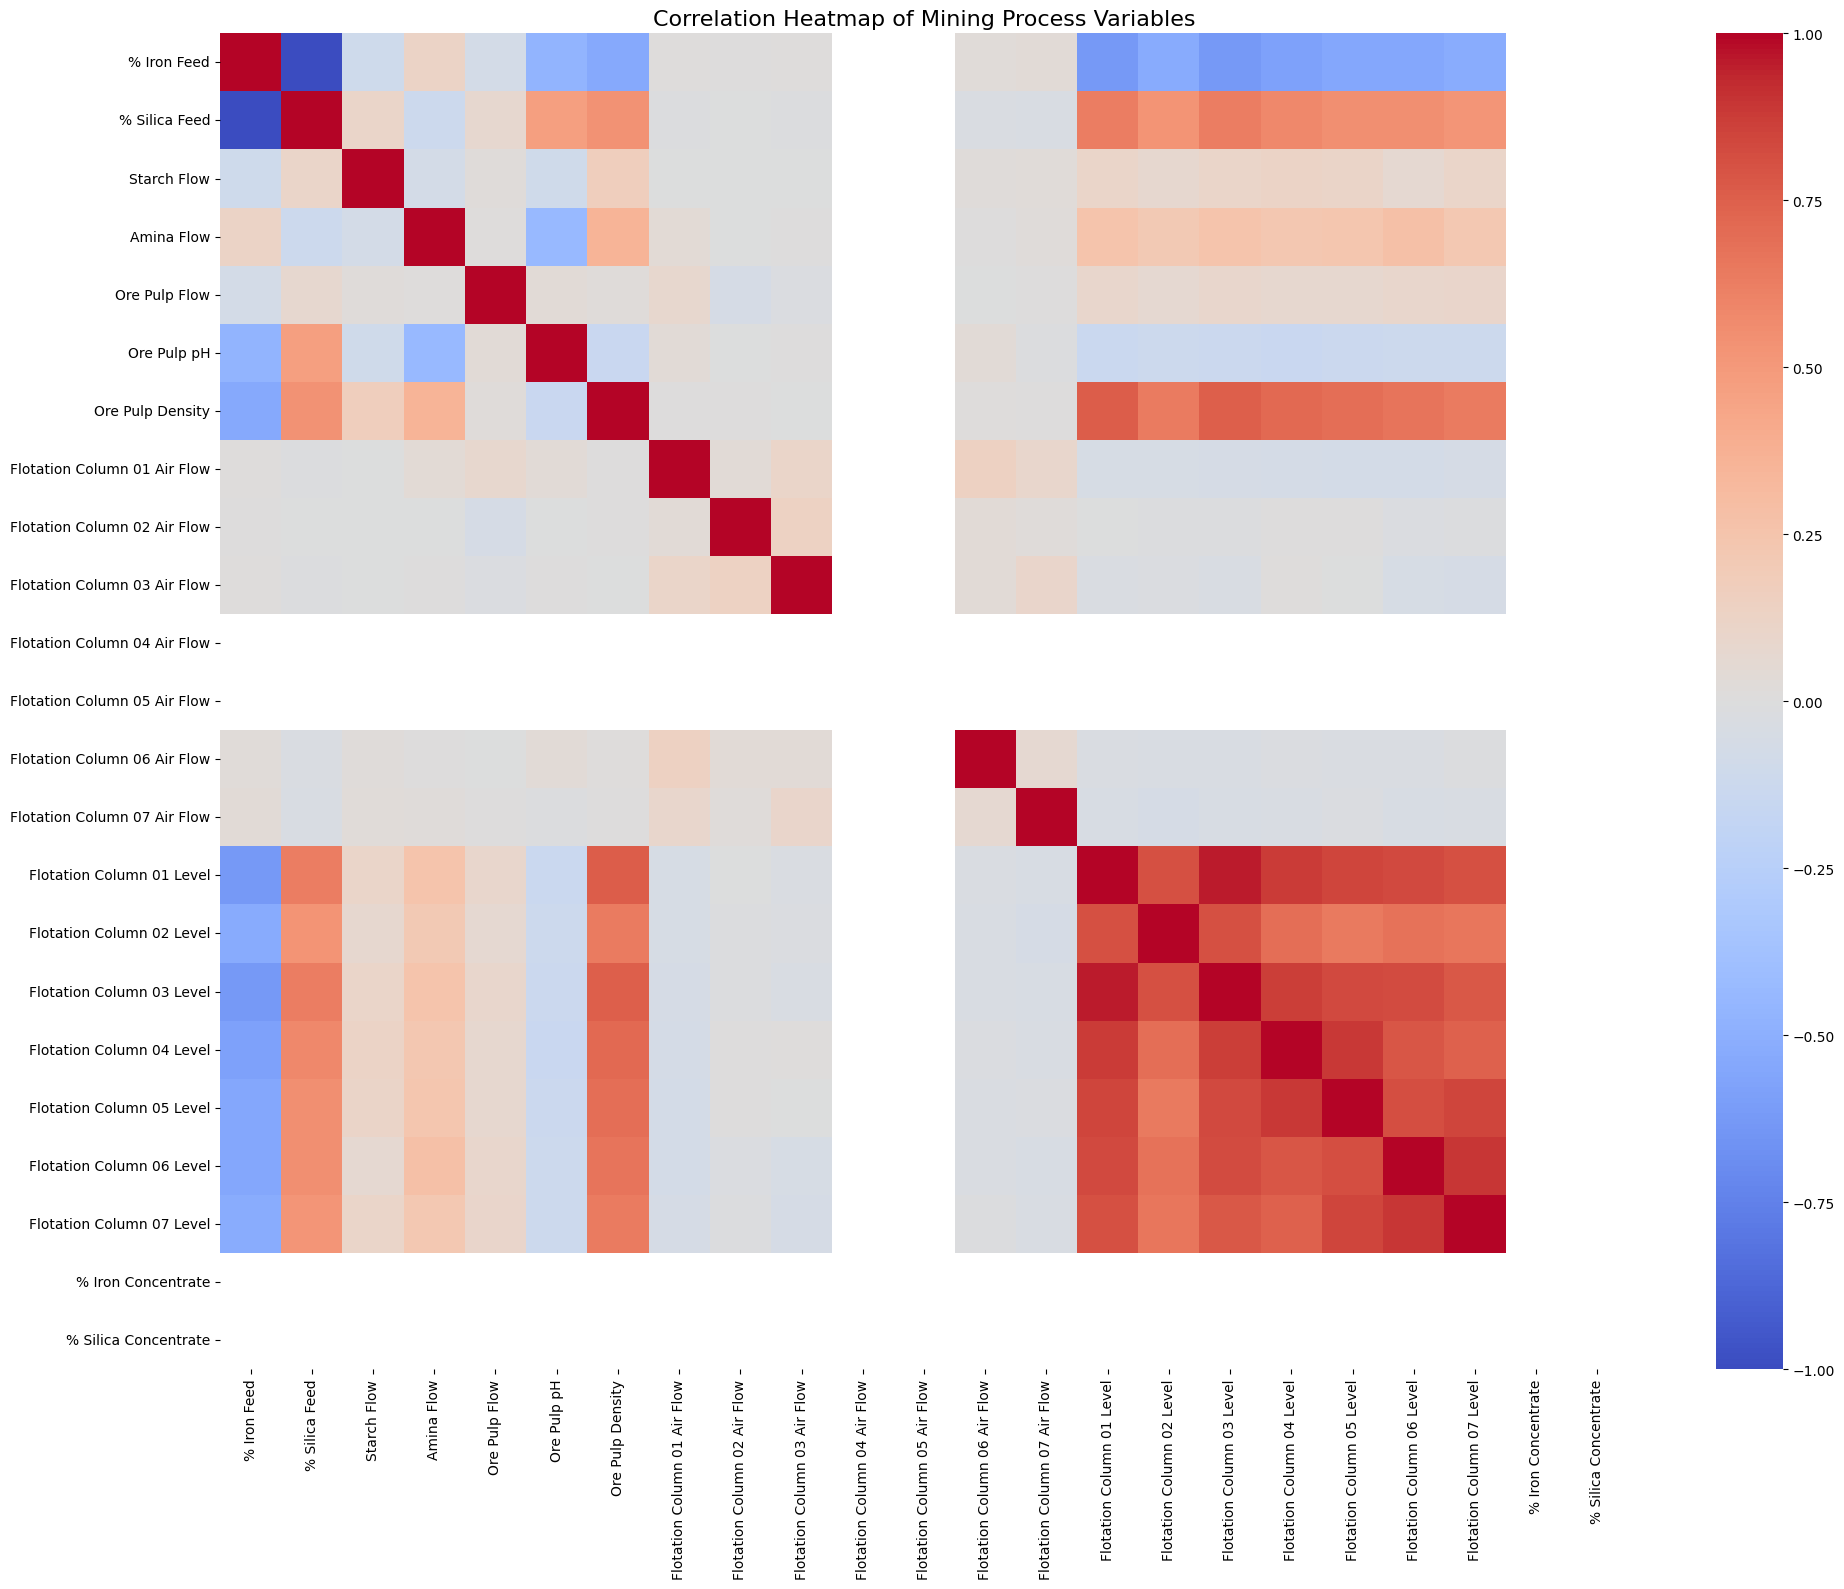

Heatmap has been generated and displayed.
Summary statistics of the dataset:
                      date  % Iron Feed  % Silica Feed  Starch Flow  \
count                 1999  1999.000000    1999.000000  1999.000000   
mean   2017-03-10 00:00:00    55.084317      17.174347  3348.103558   
min    2017-03-10 00:00:00    54.950000      16.980000    52.734400   
25%    2017-03-10 00:00:00    54.950000      16.980000  3235.845000   
50%    2017-03-10 00:00:00    55.200000      16.980000  3405.470000   
75%    2017-03-10 00:00:00    55.200000      17.400000  3582.570000   
max    2017-03-10 00:00:00    55.200000      17.400000  4612.110000   
std                    NaN     0.124683       0.209468   584.550230   

        Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
count  1999.000000    1999.000000  1999.000000       1999.000000   
mean    586.214584     399.760880    10.040967          1.747675   
min     425.415000     384.946000     9.686780          1.620520   
25%     575

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_2000.csv', sep=';')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%A, %d %B %Y', errors='coerce')

# Function to convert percentage strings to float
def percentage_to_float(x):
    return pd.to_numeric(x.str.replace(',', '.').str.rstrip('%'), errors='coerce') / 100

# Convert % Iron Feed and % Silica Feed to float
df['% Iron Feed'] = percentage_to_float(df['% Iron Feed'])
df['% Silica Feed'] = percentage_to_float(df['% Silica Feed'])

# Function to convert columns to numeric
def to_numeric(x):
    return pd.to_numeric(x.str.replace(',', '.'), errors='coerce')

# Convert all other columns to numeric
for col in df.columns:
    if col not in ['date', '% Iron Feed', '% Silica Feed']:
        df[col] = to_numeric(df[col])

# Remove rows with all NaN values
df = df.dropna(how='all')

# Calculate the correlation matrix
corr_matrix = df.drop('date', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Mining Process Variables', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print('Heatmap has been generated and displayed.')

# Display summary statistics
print('\
Summary statistics of the dataset:')
print(df.describe())
